In [32]:
import lasair
import numpy as np
import pandas as pd
import json
import yaml
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 500

In [49]:
f=open('./42SN-likecandidatesinlast14days.json')
testSne = json.load(f)

In [65]:
numZTFtest = len(testSne['digest'])
ztfNames = np.unique(np.array(([testSne['digest'][i]['objectId'] for i in range(100)]))) #Let's just take the first 100 to not spam the Lasair API

In [66]:
len(ztfNames)

100

In [67]:
ztfNames

array(['ZTF18aabejsk', 'ZTF18aagtdcu', 'ZTF18aampabj', 'ZTF18aaoinug',
       'ZTF18aatonsq', 'ZTF18aaudcpk', 'ZTF18aavvcie', 'ZTF18aawhnyz',
       'ZTF18aawlxfy', 'ZTF18aaxsgaq', 'ZTF18aaybvhx', 'ZTF18aayltmt',
       'ZTF18abaqetc', 'ZTF18abcfcka', 'ZTF18abeainm', 'ZTF18abeiqpq',
       'ZTF18abeocxc', 'ZTF18abewqhi', 'ZTF18abfmpxn', 'ZTF18abijlar',
       'ZTF18abikohu', 'ZTF18abjgzxw', 'ZTF18abjrdjs', 'ZTF18abkobtt',
       'ZTF18abkqldw', 'ZTF18abkwjcz', 'ZTF18ablmiep', 'ZTF18ablmjxl',
       'ZTF18ablrlbm', 'ZTF18abmhxgi', 'ZTF18abqavrw', 'ZTF18abrwpvo',
       'ZTF18abrzevn', 'ZTF18abrzuwi', 'ZTF18abseldk', 'ZTF18absewls',
       'ZTF18absnhwp', 'ZTF18abucphk', 'ZTF18abvivzm', 'ZTF18abvojky',
       'ZTF18abvvkpp', 'ZTF18abvvkut', 'ZTF18acauhtv', 'ZTF18acaxxgr',
       'ZTF18accbkcd', 'ZTF18accxevi', 'ZTF18acireod', 'ZTF18acnzkwo',
       'ZTF19aafoboj', 'ZTF19aaodvfx', 'ZTF19aaphtof', 'ZTF19aaqapij',
       'ZTF19aardooq', 'ZTF19aascfdf', 'ZTF19aaseizn', 'ZTF19aasgcvz',
      

In [2]:
# my_topic = 'lasair_2SN-likecandidates'
# my_topicTiDES = 'lasair_19tidesSelect'

In [3]:
# from random import randrange
# group_id = 'test{}'.format(randrange(1000))
# #group_id = 'testTiDES1'
# print('Using group_id', group_id)

Using group_id test333


In [4]:
# consumer = lasair.lasair_consumer('kafka.lsst.ac.uk:9092', group_id, my_topicTiDES)

In [5]:
# n = 0
# while n < 10:
#     msg = consumer.poll(timeout=20)
#     if msg is None:
#         break
#     if msg.error():
#         print(str(msg.error()))
#         break
#     jmsg = json.loads(msg.value())
#     print(json.dumps(jmsg, indent=2))
#     n += 1

In [68]:
token = 'bb6772e74473f2c7bceb698ae1c377d83b8f7223'
L = lasair.lasair_client(token)
c = L.lightcurves(['ZTF19abzhubs','ZTF21abccdld','ZTF22aaafjir'])
print(c)

[[{'candid': 1708190375815015014, 'jd': 2459462.6903704, 'ra': 273.3662492, 'dec': 6.9477068, 'fid': 2, 'nid': 1708, 'magpsf': 16.325199127197266, 'sigmapsf': 0.03949100151658058, 'isdiffpos': 't', 'ssdistnr': None, 'ssnamenr': None, 'drb': 0.999641478061676}, {'candid': 1708271005815015017, 'jd': 2459462.7710069, 'ra': 273.3662438, 'dec': 6.9477041, 'fid': 1, 'nid': 1708, 'magpsf': 16.288299560546875, 'sigmapsf': 0.03523100167512894, 'isdiffpos': 't', 'ssdistnr': None, 'ssnamenr': None, 'drb': None}, {'candid': 1710174825815015013, 'jd': 2459464.6748264, 'ra': 273.3662445, 'dec': 6.9477175, 'fid': 1, 'nid': 1710, 'magpsf': 16.6156005859375, 'sigmapsf': 0.03928099945187569, 'isdiffpos': 't', 'ssdistnr': None, 'ssnamenr': None, 'drb': None}, {'candid': 1710174825815025013, 'jd': 2459464.6748264, 'ra': 273.3662445, 'dec': 6.9477175, 'fid': 1, 'nid': 1710, 'magpsf': 16.6156005859375, 'sigmapsf': 0.03928099945187569, 'isdiffpos': 't', 'ssdistnr': None, 'ssnamenr': None, 'drb': None}, {'can

In [70]:
lc = pd.json_normalize(c[0])

In [123]:
'diffmaglim' in lc.columns

True

In [72]:
gIDX = lc['fid']==1
rIDX = lc['fid']==2
nonDets = lc['candid'].isna()
FiveSig = 1.09/lc['sigmapsf'] >= 5

In [80]:
nonDets

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
Name: candid, dtype: bool

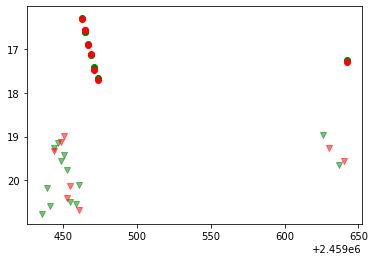

In [74]:
1.09/lc['sigmapsf']

0     27.601225
1     30.938661
2     27.748785
3     27.748785
4     21.535117
5     21.535117
6     28.892541
7     27.366307
8     22.245807
9     23.502522
10    23.018605
11    25.856956
12    21.261239
13    21.431442
14    22.434446
15    25.281095
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
30          NaN
31          NaN
32          NaN
33          NaN
34          NaN
35          NaN
36          NaN
Name: sigmapsf, dtype: float64

In [75]:
##Open Input YAML File
inputCriteriaPath = './tidesSelectionFunctions.yml'
inputCriteriaOpen = yaml.load(open(inputCriteriaPath), Loader=yaml.SafeLoader)
inputCriteriaName = inputCriteriaOpen['tidesSNZTFSelect']

In [104]:
filterDict = {1:'g', 2:'r', 'g':1, 'r':2}

def lightcurveSatify(criteria,lightcurve):
    '''
    Our paper states that the tides slection criteria is as follows:
    - only consider griz
    - must have at least 3 5sigma detections
    - Must have 5sigma detections across 2 nights
    - Must reach brighter than 22.5mag
    '''
    needFilters = criteria['filters']
    needSignificance = criteria['significance']
    minBands = criteria['minBands']
    minNights = criteria['minNights']
    magLimit = criteria['magLimit']
    
    filtersBool = np.array([filterDict[x] in inputCriteriaName['filters'] for x in lightcurve['fid']])
    significanceBool = 1.09/lightcurve['sigmapsf'] >= needSignificance
    
    sigAndFilterBool = filtersBool & significanceBool
    
    meetMinBands = len(np.unique(lightcurve['fid'][sigAndFilterBool])) >= minBands
    
    meetMinNight = len(np.unique(lightcurve['nid'][sigAndFilterBool])) >= minNights
    
    meetMagLimit = min(lightcurve['magpsf']) < magLimit
    
    if meetMinBands == meetMinNight == meetMagLimit == True:
        return True
    else:
        return False

def plotLightCurve(name, lc, triggerDate=None, saveName=None):
    plt.scatter(lc['jd'][nonDets & gIDX], lc['diffmaglim'][nonDets & gIDX], marker='v', color='green', alpha=0.5)
    plt.scatter(lc['jd'][nonDets & rIDX], lc['diffmaglim'][nonDets & rIDX], marker='v', color='red', alpha=0.5)

    plt.errorbar(lc['jd'][gIDX & FiveSig], lc['magpsf'][gIDX & FiveSig], yerr=lc['sigmapsf'][gIDX & FiveSig], fmt='o', color='green', label='g')
    plt.errorbar(lc['jd'][rIDX & FiveSig], lc['magpsf'][rIDX & FiveSig], yerr=lc['sigmapsf'][rIDX & FiveSig], fmt='o', color='red', label='r')
    
    if triggerDate is not None:
        plt.axvline(triggerDate, ls='--', c='k', label='Trigger Date')
    plt.gca().invert_yaxis()
    plt.title(name)
    plt.legend(loc='upper right')
    plt.xlabel('JD')
    plt.ylabel('Mag')
    
    if saveName is not None:
        plt.savefig(saveName, dpi=300, bbox_inches='tight')


In [105]:
lightcurveSatify(inputCriteriaName, lc)

True

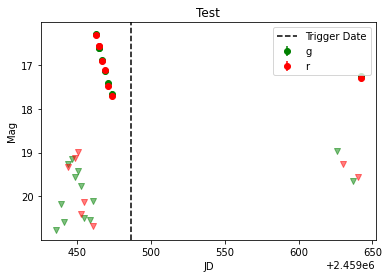

In [106]:
plotLightCurve('Test',lc,triggerDate=lc['jd'].mean(), saveName='./testOutputFigures/TestFig.png')

In [112]:
# Test stepping through data in real time

datesTest = np.unique(lc['jd'][~nonDets])

In [113]:
datesTest

array([2459462.6903704, 2459462.7710069, 2459464.6748264, 2459464.7761227,
       2459466.6665741, 2459466.7136458, 2459468.6735417, 2459468.7333796,
       2459470.6497338, 2459470.691412 , 2459473.6926736, 2459473.7326389,
       2459641.9984606, 2459642.0100231])

In [120]:
min(datesTest[np.array(list((map(lambda x: lightcurveSatify(inputCriteriaName, lc[lc['jd']<=x]), datesTest))))])

2459464.6748264

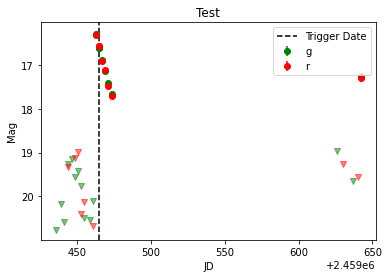

In [121]:
plotLightCurve('Test',lc,triggerDate=2459464.6748264, saveName='./testOutputFigures/TestFig.png')

In [114]:
for i in datesTest:
    passFail = lightcurveSatify(inputCriteriaName, lc[lc['jd']<=i])
    print(passFail)

False
False
True
True
True
True
True
True
True
True
True
True
True
True


In [26]:
[filterDict[x] for x in np.unique(lc['fid'])]

['g', 'r']

In [30]:
filterDict['g']

1

In [35]:
inputCriteriaName['filters']

['g', 'r', 'i', 'z']

In [39]:
[filterDict[x] in inputCriteriaName['filters'] for x in lc['fid']]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]